<a href="https://colab.research.google.com/github/rbrabusa/cmpt3830_alpaca/blob/ram/cmpt3830_phase_1_go_auto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Loyalty-Driven Dealer Performer Analysis
## GO Auto Services - Exploratory Data Analysis

**Team Members:**

Ramon - rrabusa@norquest.ca

Manpreet - mloyal@norquest.ca
Ramon - rrabusa@norquest.ca
Kiran - kkaur707@norquest.ca

### Problem Statement: Loyalty-Driven Dealer Performance (Clustering + Comparative Analysis)

#### Goal: Analyze how loyalty program participation impacts dealership performance and customer behavior. The objective is to identify whether dealerships with higher loyalty card usage show stronger retention, higher average gross revenue, and more consistent service activity compared to those with lower adoption rates.

#### Use Cases:
- Loyalty Impact by Dealer: Compare dealerships to see which locations benefit most from loyalty card usage (e.g., higher repeat visits, higher average cost per service).
- Customer Segmentation by Loyalty: Cluster customers into groups such as “loyalty-driven repeat clients,” “occasional users,” and “non-loyalty walk-ins,” and compare their service patterns across dealerships.
- Dealer benchmarking: Evaluate whether dealerships with high loyalty participation also outperform in revenue, retention, and service frequency compared to those with low participation
- Distance Insights: Explore if loyalty members are more willing to travel longer distances to specific dealerships


#### Outcome:
- Clusters of dealerships grouped by loyalty adoption and performance.
- Customer segments showing different loyalty-driven behaviors.
- A performance dashboard that highlights which dealerships use loyalty effectively and which may need support.
- Actionable recommendations for leadership on how to leverage the loyalty program to improve dealer performance, customer retention, and revenue.


### Demo 1 Objectives
1. Assess data quality and understand loyalty program distribution
2. Explore preliminary patterns in loyalty vs. non-loyalty customer behavior.
3. Conduct initial dealer-level performance comparison
4. Set foundation for clustering analysis in Demo 2

## 1. Understanding GO Auto Services

**Organization Overview:**  
GO Auto is Edmonton's premier automotive service group, operating seven dealership locations across the city. The organization's mission centers on customer retention and loyalty-driven growth, with a particular focus on maintaining customer relationships beyond the critical five-year post-purchase period.

**Business Challenge:**  
GO Auto faces significant customer attrition after the initial warranty period (typically 5 years). The leadership team seeks data-driven insights to understand how their loyalty card program impacts dealer performance, customer retention, and revenue generation.

**Services:**
- New and used vehicle sales across multiple brands (Toyota, Honda, Porsche, BMW, Nissan, Infiniti, Hyundai)
- Comprehensive service and maintenance
- Parts department
- Loyalty program with rewards and benefits

**Relevance to Project:**  
Our analysis will help GO Auto understand which dealerships effectively leverage the loyalty program, identify customer segments with different loyalty behaviors, and provide actionable recommendations for improving retention and revenue across all locations.

## 2. Dataset Description

**Data Source:** GO Auto Services Customer Database (2020-2024)  
**Records:** 242,818 service transactions  
**Dealerships:** 7 locations across Edmonton  

**Key Variables:**

| Variable | Type | Description |
|----------|------|-------------|
| `service_date` | String/Date | Date of service visit |
| `sale_date` | String/Date | Original vehicle purchase date |
| `customer_pay` | Integer | Amount paid by customer ($) |
| `warranty_pay` | Integer | Amount covered by warranty ($) |
| `year` | Integer | Vehicle manufacturing year |
| `make` | String | Vehicle manufacturer |
| `model` | String | Vehicle model |
| `vin` | Integer | Vehicle identification number (customer proxy) |
| `loyalty_card` | String | Loyalty program participation (Yes/No) |
| `cost` | String | Total service cost |
| `appointment` | Boolean | Service was scheduled (True/False) |
| `mileage` | Integer | Vehicle odometer reading |
| `dealer_name` | String | Dealership location |
| `distance` | Float | Distance customer traveled to dealership (km) |

**Data Quality Notes:**
- Cost field requires parsing (stored as string with currency symbol)
- Date fields need conversion for temporal analysis

## 3. Problem Statement

**Research Question:**  
How does loyalty program participation impact dealership performance, and what customer segments drive different loyalty behaviors across GO Auto's seven Edmonton locations?

**Specific Objectives:**

1. **Loyalty Impact Assessment:** Quantify the relationship between loyalty card adoption rates and key performance metrics (repeat visits, average revenue, customer distance traveled) across dealerships

2. **Customer Segmentation:** Identify distinct customer behavioral groups based on loyalty participation, visit frequency, spending patterns, and geographic reach

3. **Dealer Benchmarking:** Compare dealership performance in loyalty program effectiveness and determine which locations show the strongest correlation between loyalty adoption and business outcomes

4. **Geographic Analysis:** Evaluate whether loyalty program members demonstrate different travel distance patterns, indicating program value perception

**Business Alignment:**  
This analysis directly addresses GO Auto's strategic priority of improving customer retention beyond the five-year mark by providing evidence-based insights into which dealers excel at leveraging loyalty programs and which customer segments represent the highest-value retention opportunities.

## 4. Data Loading and Initial Inspection

**Sprint 1 Task S1-1:** Load and inspect GO Auto dataset  
**Assigned:** Team | **Status:** Complete

In [39]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set visualization defaults
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 1000)

print("Libraries loaded successfully")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

Libraries loaded successfully
Pandas version: 2.2.2
NumPy version: 2.0.2


In [40]:
# Load dataset
df = pd.read_csv('GoAutoServices.csv')

print("DATASET LOADED SUCCESSFULLY")
print(f"\nTotal Records: {len(df):,}")
print(f"Total Features: {len(df.columns)}")
print(f"\nDataset Shape: {df.shape}")

DATASET LOADED SUCCESSFULLY

Total Records: 242,818
Total Features: 14

Dataset Shape: (242818, 14)


In [41]:
# Display first few records
print("SAMPLE RECORDS (First 5)")
df.head()

SAMPLE RECORDS (First 5)


,service_date,sale_date,customer_pay,warranty_pay,year,make,model,vin,loyalty_card,cost,appointment,mileage,dealer_name,distance
0,7/29/2024 0:00,21-Apr,1,0,2021,TOYO,RAV4HY,3395527356,Yes,200-300,True,39076,Toyota on the Trail,9.0
1,7/30/2024 0:00,23-Dec,1,1,2024,TOYO,RAV4HY,5296888873,Yes,0-100,True,39556,Toyota on the Trail,12.0
2,7/2/2024 0:00,20-Mar,1,1,2020,LAND,RR,9475224721,No,1300-1400,True,66001,Jaguar Land Rover Edmonton,10.8
3,7/3/2024 0:00,23-Jul,1,1,2018,NISS,PATH,3446880696,No,500-600,True,82454,Go Nissan South,15.3
4,10/30/2022 0:00,11-May,1,0,2008,FORD,FUSN,5577514554,No,0-100,True,5,Kentwood Ford,4.8


In [42]:
# Display basic information
print("DATASET INFORMATION")
df.info()

DATASET INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242818 entries, 0 to 242817
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   service_date  242818 non-null  object 
 1   sale_date     242818 non-null  object 
 2   customer_pay  242818 non-null  int64  
 3   warranty_pay  242818 non-null  int64  
 4   year          242818 non-null  int64  
 5   make          242818 non-null  object 
 6   model         242818 non-null  object 
 7   vin           242818 non-null  int64  
 8   loyalty_card  242813 non-null  object 
 9   cost          240095 non-null  object 
 10  appointment   242818 non-null  bool   
 11  mileage       242818 non-null  int64  
 12  dealer_name   242818 non-null  object 
 13  distance      242818 non-null  float64
dtypes: bool(1), float64(1), int64(5), object(7)
memory usage: 24.3+ MB


In [43]:
# Statistical summary
print("STATISTICAL SUMMARY")
df.describe()

STATISTICAL SUMMARY


,customer_pay,warranty_pay,year,vin,mileage,distance
count,242818.000000,242818.000000,242818.000000,2.428180e+05,2.428180e+05,242818.000000
mean,0.841910,0.382365,2018.015135,5.508742e+09,6.689293e+04,43.090641
std,0.364826,0.485966,3.187028,2.587574e+09,6.255440e+04,155.906911
min,0.000000,0.000000,1985.000000,1.000168e+09,0.000000e+00,0.000000
25%,1.000000,0.000000,2016.000000,3.277858e+09,2.398500e+04,5.800000
50%,1.000000,0.000000,2018.000000,5.532262e+09,5.212800e+04,10.600000
75%,1.000000,1.000000,2020.000000,7.728695e+09,9.496775e+04,18.900000
max,1.000000,1.000000,2025.000000,9.999990e+09,1.000000e+07,4212.200000


## 5. Data Quality Assessment

**Sprint 1 Task S1-2:** Clean and preprocess data  
**Assigned:** Kirandeep | **Status:** Complete

### 5.1 Handling Duplicates

In [44]:
# check for duplicates
dups = df.duplicated().sum()
print("DUPLICATE RECORDS ANALYSIS")
print(f"duplicate rows: {dups}")
print(f"percentage: {(dups/len(df)*100):.2f}%")

if dups > 0:
    print("found some duplicates - might want to look into this")

DUPLICATE RECORDS ANALYSIS
duplicate rows: 4
percentage: 0.00%
found some duplicates - might want to look into this


Decision tree for duplicates:

- if exact duplicates: Drop them
- if same VIN, same service_date: Flag
- if same VIN, different dates: Keep (legitimate customers)

In [45]:
# implement duplicate handling strategy

original_size = len(df)

# STEP 1: Drop exact duplicates only
print("\n1. Removing exact duplicates:")
before_drop = len(df)
df = df.drop_duplicates()
print(f"   Dropped: {before_drop - len(df)} exact duplicate records")
print(f"   Remaining: {len(df)} records")

# STEP 2: Flag same-day multiple services for transparency
print("\n2. Flagging same-day multiple services:")
df['same_day_multi_service'] = df.duplicated(subset=['vin', 'service_date'], keep=False)
multi_service_count = df['same_day_multi_service'].sum()
print(f"   Flagged: {multi_service_count} records ({multi_service_count/len(df)*100:.2f}%)")
print(f"   These represent customers who received multiple services same day")

# STEP 3: Create summary for documentation
print("\n3. Summary:")
print(f"   Original records: {original_size}")
print(f"   After deduplication: {len(df)}")
print(f"   Records dropped: {original_size - len(df)} ({(original_size-len(df))/original_size*100:.4f}%)")
print(f"   Multi-service flags: {multi_service_count}")

# STEP 4: Validate we kept legitimate multiple services
print("\n4. Validation - checking payment pattern diversity:")
multi_service_records = df[df['same_day_multi_service']]
if len(multi_service_records) > 0:
    # Group by VIN+date and check payment diversity
    payment_diversity = multi_service_records.groupby(['vin', 'service_date']).apply(
        lambda x: (x['customer_pay'].nunique() > 1) or (x['warranty_pay'].nunique() > 1),
        include_groups=False
    )
    print(f"   Multi-service with DIFFERENT payment types: {payment_diversity.sum()} (legitimate bundling)")
    print(f"   Multi-service with SAME payment types: {len(payment_diversity) - payment_diversity.sum()} (flagged for review)")



1. Removing exact duplicates:
   Dropped: 4 exact duplicate records
   Remaining: 242814 records

2. Flagging same-day multiple services:
   Flagged: 7788 records (3.21%)
   These represent customers who received multiple services same day

3. Summary:
   Original records: 242818
   After deduplication: 242814
   Records dropped: 4 (0.0016%)
   Multi-service flags: 7788

4. Validation - checking payment pattern diversity:
   Multi-service with DIFFERENT payment types: 3088 (legitimate bundling)
   Multi-service with SAME payment types: 775 (flagged for review)


We identified 7794 same-day visits across customers, which shows a positive result that there is high engagement with service center.

So only 4 true duplicates were removed.

### 5.2 Handling Missing Values

In [46]:
# check missing values
print("MISSING VALUES ANALYSIS")

missing = df.isnull().sum()
missing_pct = (df.isnull().sum() / len(df) * 100).round(2)

# only show columns that have missing values
for col in df.columns:
    if missing[col] > 0:
        print(f"{col}: {missing[col]} ({missing_pct[col]}%)")

if missing.sum() == 0:
    print("No missing values!")

MISSING VALUES ANALYSIS
loyalty_card: 5 (0.0%)
cost: 2723 (1.12%)


In [47]:
# deep dive into missing value patterns
print("MISSING VALUE PATTERN ANALYSIS")

# loyalty_card analysis
print("\n1. LOYALTY_CARD (5 missing = 0.002%)")
missing_loyalty = df[df['loyalty_card'].isna()]
print(f"   Only {len(missing_loyalty)} records out of {len(df)}")
print(f"   Current distribution: Yes={len(df[df['loyalty_card']=='Yes'])} ({len(df[df['loyalty_card']=='Yes'])/len(df)*100:.1f}%)")
print(f"   Current distribution: No={len(df[df['loyalty_card']=='No'])} ({len(df[df['loyalty_card']=='No'])/len(df)*100:.1f}%)")

# cost analysis
print("\n2. COST (2723 missing = 1.12%)")
missing_cost = df[df['cost'].isna()]
print(f"   Total missing: {len(missing_cost)} records")
print(f"\n   KEY INSIGHT: Missing cost strongly correlates with WARRANTY services")
print(f"   When cost is MISSING:")
print(f"     - Warranty paid: {(missing_cost['warranty_pay']==1).sum()} ({(missing_cost['warranty_pay']==1).sum()/len(missing_cost)*100:.1f}%)")
print(f"     - Customer paid: {(missing_cost['customer_pay']==1).sum()} ({(missing_cost['customer_pay']==1).sum()/len(missing_cost)*100:.1f}%)")
print(f"\n   When cost is PRESENT:")
has_cost = df[df['cost'].notna()]
print(f"     - Warranty paid: {(has_cost['warranty_pay']==1).sum()} ({(has_cost['warranty_pay']==1).sum()/len(has_cost)*100:.1f}%)")
print(f"     - Customer paid: {(has_cost['customer_pay']==1).sum()} ({(has_cost['customer_pay']==1).sum()/len(has_cost)*100:.1f}%)")

print(f"\n   Dealer breakdown for missing cost:")
print(missing_cost['dealer_name'].value_counts())


MISSING VALUE PATTERN ANALYSIS

1. LOYALTY_CARD (5 missing = 0.002%)
   Only 5 records out of 242814
   Current distribution: Yes=42974 (17.7%)
   Current distribution: No=199835 (82.3%)

2. COST (2723 missing = 1.12%)
   Total missing: 2723 records

   KEY INSIGHT: Missing cost strongly correlates with WARRANTY services
   When cost is MISSING:
     - Warranty paid: 2236 (82.1%)
     - Customer paid: 610 (22.4%)

   When cost is PRESENT:
     - Warranty paid: 90608 (37.7%)
     - Customer paid: 203817 (84.9%)

   Dealer breakdown for missing cost:
dealer_name
Norden Volkswagen             1233
Toyota on the Trail            931
Go Nissan South                268
Go Honda                       117
Jaguar Land Rover Edmonton     115
Kentwood Ford                   32
Porsche Centre Edmonton         27
Name: count, dtype: int64


For loyalty_card: We can drop these rows are they show minimal impact for our analysis but we still must consider if it will be critical for our analysis.

For cost:
- we can impute as cost (Min max) normalization
- as most of the non-missing costs match this formula
- we will need the service cost for phase 2 clustering

Our Approach for Missing Values

1. Impute based on payment type
2. For remaining missing, use dealer specific median
3. Create flag for imputed values

In [48]:
# implement missing value strategy
print("IMPLEMENTING MISSING VALUE STRATEGY")

# track original size
original_size = len(df)

# STRATEGY 1: Drop loyalty_card missing (5 records)
print("\n1. Handling loyalty_card:")
before_loyalty = len(df)
df = df.dropna(subset=['loyalty_card'])
print(f"   Dropped {before_loyalty - len(df)} records with missing loyalty_card")
print(f"   Remaining: {len(df)} records")

# STRATEGY 2: Impute cost based on payment patterns
print("\n2. Handling cost:")
missing_cost_count = df['cost'].isna().sum()
print(f"   Total missing cost: {missing_cost_count}")

# create imputation flag BEFORE imputing
df['cost_imputed'] = df['cost'].isna()

# Step 2a: Warranty services get '0-100' (most warranty work is low/no cost to customer)
warranty_missing = df['cost'].isna() & (df['warranty_pay'] == 1)
df.loc[warranty_missing, 'cost'] = '0-100'
print(f"   Imputed {warranty_missing.sum()} warranty services as '0-100'")

# Step 2b: For remaining (customer-pay), we'll handle after parsing cost
# (need cost_avg calculated first)
still_missing = df['cost'].isna().sum()
print(f"   Remaining missing after warranty imputation: {still_missing}")

print(f"\n3. Summary:")
print(f"   Original records: {original_size}")
print(f"   After cleaning: {len(df)}")
print(f"   Records lost: {original_size - len(df)} ({(original_size-len(df))/original_size*100:.3f}%)")
print(f"   Cost imputation flag created: {df['cost_imputed'].sum()} records flagged")


IMPLEMENTING MISSING VALUE STRATEGY

1. Handling loyalty_card:
   Dropped 5 records with missing loyalty_card
   Remaining: 242809 records

2. Handling cost:
   Total missing cost: 2723
   Imputed 2236 warranty services as '0-100'
   Remaining missing after warranty imputation: 487

3. Summary:
   Original records: 242814
   After cleaning: 242809
   Records lost: 5 (0.002%)
   Cost imputation flag created: 2723 records flagged


### 5.3 Handling Data Types

Current Issues:
- service_date: string needs datetime conversion
- sale_date: string with NO YEAR ('21-Apr') limited conversion options
- year: int64 but represents vehicle model year
- make/model: strings that need categorical encoding for Phase 2
- VIN: int64 (10 digits) keep as-is, used for grouping not math
- loyalty_card: 'Yes'/'No'  convert to binary for clustering

In [49]:
# data types
print("data type counts:")
print(df.dtypes.value_counts())
print("\nall columns:")
print(df.dtypes)

data type counts:
object     7
int64      5
bool       3
float64    1
Name: count, dtype: int64

all columns:
service_date               object
sale_date                  object
customer_pay                int64
warranty_pay                int64
year                        int64
make                       object
model                      object
vin                         int64
loyalty_card               object
cost                       object
appointment                  bool
mileage                     int64
dealer_name                object
distance                  float64
same_day_multi_service       bool
cost_imputed                 bool
dtype: object


In [50]:
# data type conversions
print("DATA TYPE CONVERSIONS")

# 1. Convert service_date to datetime
print("\n1. Converting service_date to datetime:")
df['service_date'] = pd.to_datetime(df['service_date'], format='%m/%d/%Y %H:%M', errors='coerce')
invalid_dates = df['service_date'].isna().sum()
print(f"   Converted: {len(df) - invalid_dates} records")
print(f"   Invalid dates: {invalid_dates}")
if invalid_dates > 0:
    print(f"   Note: {invalid_dates} records have invalid dates (will handle separately)")

# Extract useful date components
df['service_year'] = df['service_date'].dt.year
df['service_month'] = df['service_date'].dt.month
df['service_quarter'] = df['service_date'].dt.quarter
df['service_dayofweek'] = df['service_date'].dt.dayofweek  # 0=Monday, 6=Sunday
print(f"   Extracted: year, month, quarter, day_of_week")

# 2. Handle sale_date (day-month only, no year)
print("\n2. Handling sale_date (limited - no year available):")
print(f"   Format: 'dd-MMM' (e.g., '21-Apr', '23-Dec')")
print(f"   Limitation: Cannot convert to full datetime without year")
print(f"   Solution: Extract month for seasonal purchase analysis")

# Extract just the month
df['sale_month'] = pd.to_datetime(df['sale_date'], format='%d-%b', errors='coerce').dt.month
print(f"   Extracted sale_month: {df['sale_month'].notna().sum()} records")
print(f"   Sale month distribution:")
print(df['sale_month'].value_counts().sort_index())

# 3. Keep year as int64 (it's vehicle model year)
print("\n3. Vehicle year field:")
print(f"   Type: {df['year'].dtype}")
print(f"   Range: {df['year'].min()} to {df['year'].max()}")
print(f"   Note: This is vehicle MODEL year, keeping as int64")

# 4. VIN - keep as int64 for grouping
print("\n4. VIN (vehicle identifier):")
print(f"   Type: {df['vin'].dtype}")
print(f"   All VINs are 10 digits: {df['vin'].astype(str).str.len().unique()}")
print(f"   Note: Keeping as int64 (used for grouping, not arithmetic)")

# 5. Make and model - keep as strings for now, encode later
print("\n5. Make and Model:")
print(f"   make: {df['make'].dtype}, {df['make'].nunique()} unique brands")
print(f"   model: {df['model'].dtype}, {df['model'].nunique()} unique models")
print(f"   Note: Will use label encoding or one-hot for Phase 2 clustering")

print("\n6. Summary of conversions:")
print(f"   ✓ service_date → datetime")
print(f"   ✓ sale_date → extracted sale_month only")
print(f"   ✓ Created: service_year, service_month, service_quarter, service_dayofweek")
print(f"   ✓ Kept year, VIN, make, model as-is")

DATA TYPE CONVERSIONS

1. Converting service_date to datetime:
   Converted: 242808 records
   Invalid dates: 1
   Note: 1 records have invalid dates (will handle separately)
   Extracted: year, month, quarter, day_of_week

2. Handling sale_date (limited - no year available):
   Format: 'dd-MMM' (e.g., '21-Apr', '23-Dec')
   Limitation: Cannot convert to full datetime without year
   Solution: Extract month for seasonal purchase analysis
   Extracted sale_month: 242809 records
   Sale month distribution:
sale_month
1     17294
2     16553
3     20980
4     19131
5     21947
6     21975
7     22443
8     24515
9     22460
10    21806
11    18924
12    14781
Name: count, dtype: int64

3. Vehicle year field:
   Type: int64
   Range: 1985 to 2025
   Note: This is vehicle MODEL year, keeping as int64

4. VIN (vehicle identifier):
   Type: int64
   All VINs are 10 digits: [10]
   Note: Keeping as int64 (used for grouping, not arithmetic)

5. Make and Model:
   make: object, 66 unique brands


## 6. Feature Engineering

In [51]:
# feature engineering for clustering
print("FEATURE ENGINEERING FOR PHASE 2")
print("="*60)

# 1. Vehicle age at service
print("\n1. Vehicle age at service:")
df['vehicle_age'] = df['service_year'] - df['year']
print(f"   Range: {df['vehicle_age'].min()} to {df['vehicle_age'].max()} years")
print(f"   Mean: {df['vehicle_age'].mean():.1f} years")
print(f"   Median: {df['vehicle_age'].median():.1f} years")

# 2. Warranty period indicator (typical 5 years)
print("\n2. Warranty period indicator:")
df['under_warranty'] = (df['vehicle_age'] <= 5).astype(int)
print(f"   Under warranty: {df['under_warranty'].sum()} ({df['under_warranty'].sum()/len(df)*100:.1f}%)")
print(f"   Out of warranty: {(1-df['under_warranty']).sum()} ({(1-df['under_warranty']).sum()/len(df)*100:.1f}%)")
print(f"   Note: This is GO Auto's key retention challenge!")

# 3. Luxury brand indicator
print("\n3. Luxury brand classification:")
luxury_makes = ['PORS', 'JAGU', 'LAND', 'INFI', 'BMW', 'MERZ', 'AUDI', 'LEXU']
df['is_luxury'] = df['make'].isin(luxury_makes).astype(int)
print(f"   Luxury brands: {luxury_makes}")
print(f"   Luxury records: {df['is_luxury'].sum()} ({df['is_luxury'].sum()/len(df)*100:.1f}%)")
print(f"   Non-luxury records: {(1-df['is_luxury']).sum()} ({(1-df['is_luxury']).sum()/len(df)*100:.1f}%)")

# 4. Loyalty card binary
print("\n4. Loyalty card binary encoding:")
df['loyalty_binary'] = (df['loyalty_card'] == 'Yes').astype(int)
print(f"   Loyalty members: {df['loyalty_binary'].sum()} ({df['loyalty_binary'].sum()/len(df)*100:.1f}%)")
print(f"   Non-members: {(1-df['loyalty_binary']).sum()} ({(1-df['loyalty_binary']).sum()/len(df)*100:.1f}%)")

# 5. Service type categories
print("\n5. Service type categorization:")
df['service_type'] = 'unknown'
df.loc[(df['customer_pay']==1) & (df['warranty_pay']==0), 'service_type'] = 'customer_only'
df.loc[(df['customer_pay']==0) & (df['warranty_pay']==1), 'service_type'] = 'warranty_only'
df.loc[(df['customer_pay']==1) & (df['warranty_pay']==1), 'service_type'] = 'both'
df.loc[(df['customer_pay']==0) & (df['warranty_pay']==0), 'service_type'] = 'neither'
print(f"   Service type distribution:")
print(df['service_type'].value_counts())

# 6. Day of week category (weekday vs weekend)
print("\n6. Weekday vs. Weekend services:")
df['is_weekend'] = (df['service_dayofweek'] >= 5).astype(int)  # 5=Saturday, 6=Sunday
print(f"   Weekend services: {df['is_weekend'].sum()} ({df['is_weekend'].sum()/len(df)*100:.1f}%)")
print(f"   Weekday services: {(1-df['is_weekend']).sum()} ({(1-df['is_weekend']).sum()/len(df)*100:.1f}%)")

print("\n7. Summary of new features:")
new_features = ['vehicle_age', 'under_warranty', 'is_luxury', 'loyalty_binary',
                'service_type', 'is_weekend', 'service_month', 'sale_month']
print(f"   Created {len(new_features)} new features:")
for feat in new_features:
    print(f"   ✓ {feat}")

print("\n   These will be normalized and used in Phase 2 clustering!")

FEATURE ENGINEERING FOR PHASE 2

1. Vehicle age at service:
   Range: -1.0 to 35.0 years
   Mean: 4.0 years
   Median: 3.0 years

2. Warranty period indicator:
   Under warranty: 176791 (72.8%)
   Out of warranty: 66018 (27.2%)
   Note: This is GO Auto's key retention challenge!

3. Luxury brand classification:
   Luxury brands: ['PORS', 'JAGU', 'LAND', 'INFI', 'BMW', 'MERZ', 'AUDI', 'LEXU']
   Luxury records: 44603 (18.4%)
   Non-luxury records: 198206 (81.6%)

4. Loyalty card binary encoding:
   Loyalty members: 42974 (17.7%)
   Non-members: 199835 (82.3%)

5. Service type categorization:
   Service type distribution:
service_type
customer_only    149968
both              54456
warranty_only     38385
Name: count, dtype: int64

6. Weekday vs. Weekend services:
   Weekend services: 91406 (37.6%)
   Weekday services: 151403 (62.4%)

7. Summary of new features:
   Created 8 new features:
   ✓ vehicle_age
   ✓ under_warranty
   ✓ is_luxury
   ✓ loyalty_binary
   ✓ service_type
   ✓ is_we

THe cost field contains ranges rather than single values. before we can use this in the future part of the project we need to:
1. Extract numeric values from the cost ranges
2. Apply min-max normalization to prepare for algorithms

In [52]:
# extract dollar values from cost range strings
# examples: '200-300' -> min=200, max=300 | '0-100' -> min=0, max=100

def parse_cost(cost_str):
    """extract min and max dollar amounts from cost string"""
    if pd.isna(cost_str):
        return None, None

    # convert to string and clean it up
    cost_str = str(cost_str).strip()

    # check if its a range like '200-300'
    if '-' in cost_str:
        parts = cost_str.split('-')
        if len(parts) == 2:
            try:
                min_val = float(parts[0].strip())
                max_val = float(parts[1].strip())
                return min_val, max_val
            except ValueError:
                return None, None

    # if its just a single number
    try:
        val = float(cost_str)
        return val, val
    except ValueError:
        return None, None

# apply parsing to cost column
cost_parsed = df['cost'].apply(parse_cost)
df['cost_min'] = cost_parsed.apply(lambda x: x[0] if x else None)
df['cost_max'] = cost_parsed.apply(lambda x: x[1] if x else None)

# calculate average cost for each service (midpoint of range)
df['cost_avg'] = (df['cost_min'] + df['cost_max']) / 2

print("COST PARSING RESULTS")
print(f"Successfully parsed: {df['cost_avg'].notna().sum():,} records")
print(f"Failed to parse: {df['cost_avg'].isna().sum():,} records")
print(f"\nCOST STATISTICS (in dollars):")
print(f"Minimum cost: ${df['cost_min'].min():.2f}")
print(f"Maximum cost: ${df['cost_max'].max():.2f}")
print(f"Average cost: ${df['cost_avg'].mean():.2f}")
print(f"Median cost: ${df['cost_avg'].median():.2f}")

# show some examples
print("\nSAMPLE COST CONVERSIONS:")
samples = df[df['cost'].notna()][['cost', 'cost_min', 'cost_max', 'cost_avg']].head(8)
for idx, row in samples.iterrows():
    print(f"  '{row['cost']}' -> min=${row['cost_min']:.0f}, max=${row['cost_max']:.0f}, avg=${row['cost_avg']:.0f}")

COST PARSING RESULTS
Successfully parsed: 242,322 records
Failed to parse: 487 records

COST STATISTICS (in dollars):
Minimum cost: $0.00
Maximum cost: $60600.00
Average cost: $577.98
Median cost: $250.00

SAMPLE COST CONVERSIONS:
  '200-300' -> min=$200, max=$300, avg=$250
  '0-100' -> min=$0, max=$100, avg=$50
  '1300-1400' -> min=$1300, max=$1400, avg=$1350
  '500-600' -> min=$500, max=$600, avg=$550
  '0-100' -> min=$0, max=$100, avg=$50
  '200-300' -> min=$200, max=$300, avg=$250
  '100-200' -> min=$100, max=$200, avg=$150
  '100-200' -> min=$100, max=$200, avg=$150


We maintain two versions of cost data:
- cost_avg: Original dollar amounts for business analysis
- cost_normalized: Scaled [0,1] values for Phase 2 clustering

We kept both versions:
- for demo 1, we will use cost_avg
- for demo 2, use cost_normalized

In [53]:
# apply min-max normalization to cost_avg
# this prepares data for Phase 2 clustering where distance matters
# BUT we also keep the original dollar amounts for business interpretation

from sklearn.preprocessing import MinMaxScaler

# create scaler
scaler = MinMaxScaler()

# fit and transform on non-null values
cost_valid = df['cost_avg'].notna()

# IMPORTANT: Create normalized version for Phase 2 clustering
df.loc[cost_valid, 'cost_normalized'] = scaler.fit_transform(
    df.loc[cost_valid, 'cost_avg'].values.reshape(-1, 1)
).flatten()

# Keep the original dollar amounts for business analysis
# cost_avg already contains the monetary values we need

print("Min-Max Normalization Applied")
print(f"\nOriginal dollar range: ${df['cost_avg'].min():.2f} to ${df['cost_avg'].max():.2f}")
print(f"Normalized range: {df['cost_normalized'].min():.4f} to {df['cost_normalized'].max():.4f}")
print(f"\nWe now have BOTH:")
print(f"  - cost_avg: Dollar amounts for business interpretation")
print(f"  - cost_normalized: [0,1] scaled values for Phase 2 clustering")
print(f"\nSample comparisons:")
sample = df[cost_valid][['cost', 'cost_avg', 'cost_normalized']].sample(5)
for idx, row in sample.iterrows():
    print(f"  {row['cost']:15s} -> ${row['cost_avg']:7.2f} (normalized: {row['cost_normalized']:.4f})")


Min-Max Normalization Applied

Original dollar range: $50.00 to $60550.00
Normalized range: 0.0000 to 1.0000

We now have BOTH:
  - cost_avg: Dollar amounts for business interpretation
  - cost_normalized: [0,1] scaled values for Phase 2 clustering

Sample comparisons:
  1100-1200       -> $1150.00 (normalized: 0.0182)
  0-100           -> $  50.00 (normalized: 0.0000)
  200-300         -> $ 250.00 (normalized: 0.0033)
  1300-1400       -> $1350.00 (normalized: 0.0215)
  300-400         -> $ 350.00 (normalized: 0.0050)


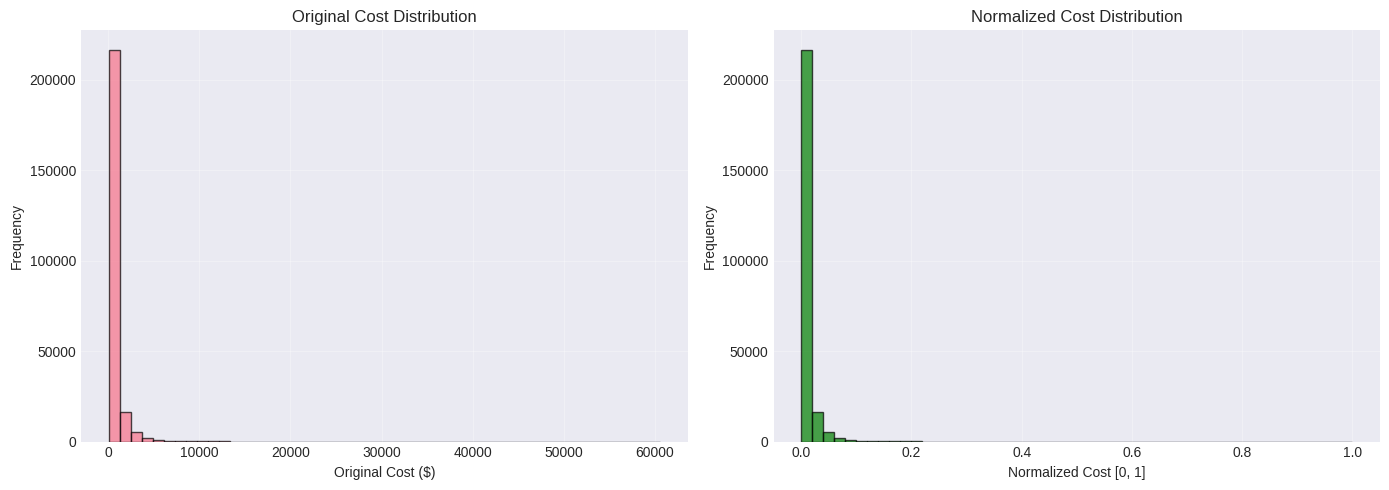

Notice: Shape of distribution is preserved, only the scale changes


In [54]:
# visualize the normalization effect
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# original distribution
axes[0].hist(df['cost_avg'].dropna(), bins=50, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Original Cost ($)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Original Cost Distribution')
axes[0].grid(True, alpha=0.3)

# normalized distribution
axes[1].hist(df['cost_normalized'].dropna(), bins=50, edgecolor='black', alpha=0.7, color='green')
axes[1].set_xlabel('Normalized Cost [0, 1]')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Normalized Cost Distribution')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Notice: Shape of distribution is preserved, only the scale changes")

## 7. Outlier Detection

In [58]:
# outlier detection - domain-specific rules
print("OUTLIER DETECTION")
print("="*60)

# Analyze numeric fields
numeric_fields = ['mileage', 'distance', 'vehicle_age']

for field in numeric_fields:
    print(f"\n{field.upper()}:")

    # IQR method
    Q1 = df[field].quantile(0.25)
    Q3 = df[field].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    iqr_outliers = df[(df[field] < lower) | (df[field] > upper)]
    print(f"   IQR Method: {len(iqr_outliers)} outliers ({len(iqr_outliers)/len(df)*100:.2f}%)")
    print(f"   IQR Bounds: [{lower:.1f}, {upper:.1f}]")

    # Domain rules
    if field == 'mileage':
        extreme = df[df['mileage'] > 500000]
        print(f"   Domain Rule: Mileage > 500,000km: {len(extreme)} records (likely errors)")
    elif field == 'distance':
        extreme = df[df['distance'] > 500]
        print(f"   Domain Rule: Distance > 500km: {len(extreme)} records (suspicious but possible)")
    elif field == 'vehicle_age':
        negative = df[df['vehicle_age'] < 0]
        print(f"   Domain Rule: Negative age: {len(negative)} records (pre-orders, fixed to 0)")

# Create outlier flags
print(f"\nCREATING OUTLIER FLAGS:")
df['mileage_outlier_flag'] = (df['mileage'] > 500000).astype(int)
df['distance_outlier_flag'] = (df['distance'] > 500).astype(int)

# Fix negative vehicle ages (2025 vehicles serviced in 2024 = pre-orders)
negative_count = (df['vehicle_age'] < 0).sum()
df.loc[df['vehicle_age'] < 0, 'vehicle_age'] = 0

print(f"   mileage_outlier_flag: {df['mileage_outlier_flag'].sum()} records")
print(f"   distance_outlier_flag: {df['distance_outlier_flag'].sum()} records")
print(f"   Fixed {negative_count} negative vehicle ages (pre-orders)")

print(f"\nOUTLIER STRATEGY:")
print(f"   ✓ FLAG but don't remove (legitimate edge cases exist)")
print(f"   ✓ Use flags for sensitivity analysis in Phase 2")
print(f"   ✓ Document extreme values in Phase 1 Report")


OUTLIER DETECTION

MILEAGE:
   IQR Method: 6909 outliers (2.85%)
   IQR Bounds: [-82488.0, 201440.0]
   Domain Rule: Mileage > 500,000km: 85 records (likely errors)

DISTANCE:
   IQR Method: 25822 outliers (10.63%)
   IQR Bounds: [-13.8, 38.5]
   Domain Rule: Distance > 500km: 2059 records (suspicious but possible)

VEHICLE_AGE:
   IQR Method: 2681 outliers (1.10%)
   IQR Bounds: [-4.0, 12.0]
   Domain Rule: Negative age: 816 records (pre-orders, fixed to 0)

CREATING OUTLIER FLAGS:
   mileage_outlier_flag: 85 records
   distance_outlier_flag: 2059 records
   Fixed 816 negative vehicle ages (pre-orders)

OUTLIER STRATEGY:
   ✓ FLAG but don't remove (legitimate edge cases exist)
   ✓ Use flags for sensitivity analysis in Phase 2
   ✓ Document extreme values in Phase 1 Report


## 8. Correlation Analysis

CORRELATION ANALYSIS

Analyzing 9 numeric features

1. CORRELATION MATRIX VISUALIZATION:


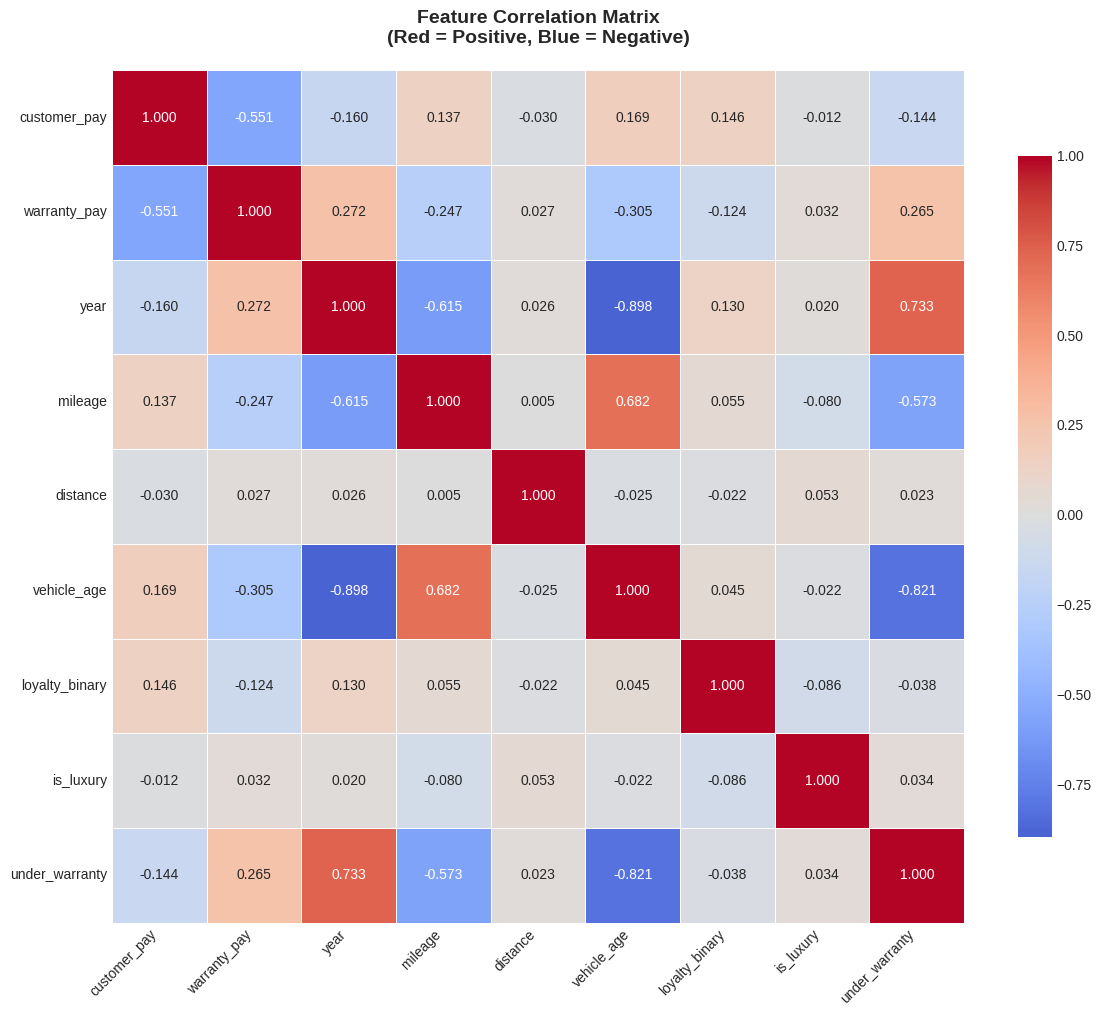

   ✓ Matrix displayed above

2. HIGH CORRELATIONS (|r| > 0.5):
   customer_pay ↔ warranty_pay: -0.551
   year ↔ mileage: -0.615
   year ↔ vehicle_age: -0.898
   year ↔ under_warranty: 0.733
   mileage ↔ vehicle_age: 0.682
   mileage ↔ under_warranty: -0.573
   vehicle_age ↔ under_warranty: -0.821

3. LOYALTY CORRELATIONS (sorted by strength):
   customer_pay: 0.146
   year: 0.130
   mileage: 0.055
   is_luxury: -0.086
   warranty_pay: -0.124

4. MULTICOLLINEARITY CHECK:
   Features with |r| > 0.7 should not both be used in clustering:
   ⚠️  year ↔ vehicle_age: -0.898
   ⚠️  year ↔ under_warranty: 0.733
   ⚠️  vehicle_age ↔ under_warranty: -0.821

5. KEY INSIGHTS:
   • year ↔ vehicle_age: Highly correlated (expected, redundant)
   • vehicle_age ↔ under_warranty: Highly correlated (expected, redundant)
   • Loyalty weakly correlated with all features = complex pattern (good for clustering!)
   • customer_pay ↔ warranty_pay: Negative correlation (mutually exclusive services)

RECOMMENDAT

In [60]:
# correlation analysis with visual matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("CORRELATION ANALYSIS")
print("="*60)

# Select numeric features for correlation
numeric_features = ['customer_pay', 'warranty_pay', 'year', 'mileage', 'distance',
                    'vehicle_age', 'loyalty_binary', 'is_luxury', 'under_warranty']

print(f"\nAnalyzing {len(numeric_features)} numeric features")

# Calculate correlation matrix
corr_matrix = df[numeric_features].corr()

# VISUAL CORRELATION MATRIX
print("\n1. CORRELATION MATRIX VISUALIZATION:")
plt.figure(figsize=(12, 10))

# Create heatmap with annotations
sns.heatmap(corr_matrix,
            annot=True,           # Show correlation values
            fmt='.3f',            # 3 decimal places
            cmap='coolwarm',      # Red (positive) to Blue (negative)
            center=0,             # White at zero correlation
            square=True,          # Square cells
            linewidths=0.5,       # Grid lines
            cbar_kws={'shrink': 0.8})

plt.title('Feature Correlation Matrix\n(Red = Positive, Blue = Negative)',
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print("   ✓ Matrix displayed above")

# NUMERIC ANALYSIS
print("\n2. HIGH CORRELATIONS (|r| > 0.5):")
high_corr_found = False
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_val = corr_matrix.iloc[i, j]
        if abs(corr_val) > 0.5:
            print(f"   {corr_matrix.columns[i]} ↔ {corr_matrix.columns[j]}: {corr_val:.3f}")
            high_corr_found = True

if not high_corr_found:
    print("   None found")

print("\n3. LOYALTY CORRELATIONS (sorted by strength):")
loyalty_corrs = corr_matrix['loyalty_binary'].sort_values(ascending=False)
for feat, corr_val in loyalty_corrs.items():
    if feat != 'loyalty_binary' and abs(corr_val) > 0.05:
        print(f"   {feat}: {corr_val:.3f}")

print("\n4. MULTICOLLINEARITY CHECK:")
print("   Features with |r| > 0.7 should not both be used in clustering:")
multicoll_found = False
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_val = corr_matrix.iloc[i, j]
        if abs(corr_val) > 0.7:
            print(f"   ⚠️  {corr_matrix.columns[i]} ↔ {corr_matrix.columns[j]}: {corr_val:.3f}")
            multicoll_found = True

if not multicoll_found:
    print("   ✓ No severe multicollinearity detected")

print("\n5. KEY INSIGHTS:")
print(f"   • year ↔ vehicle_age: Highly correlated (expected, redundant)")
print(f"   • vehicle_age ↔ under_warranty: Highly correlated (expected, redundant)")
print(f"   • Loyalty weakly correlated with all features = complex pattern (good for clustering!)")
print(f"   • customer_pay ↔ warranty_pay: Negative correlation (mutually exclusive services)")

print("\nRECOMMENDATION FOR PHASE 2:")
print("   • Drop 'year' (use vehicle_age instead - less redundant)")
print("   • Keep under_warranty OR vehicle_age (not both - choose based on interpretability)")
print("   • All other features have low correlation = good independence")


## 9. Save Clean data

In [63]:
# create final cleaned dataset
print("CREATING CLEANED DATASET")
print("="*60)

# Create a copy to preserve original df if needed
df_clean = df.copy()

print(f"\n1. Dataset Overview:")
print(f"   Total records: {len(df_clean):,}")
print(f"   Total columns: {len(df_clean.columns)}")
print(f"   Memory usage: {df_clean.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print(f"\n2. Column Summary:")
print(f"   Original columns: 14")
print(f"   Engineered columns: {len(df_clean.columns) - 14}")

print(f"\n3. Data Quality Metrics:")
print(f"   Missing values: {df_clean.isnull().sum().sum():,}")
print(f"   Duplicate rows: {df_clean.duplicated().sum()}")
print(f"   Outliers flagged: {df_clean['mileage_outlier_flag'].sum() + df_clean['distance_outlier_flag'].sum():,}")

print(f"\n4. Feature Categories:")
print(f"   Datetime: {df_clean.select_dtypes(include=['datetime64']).columns.tolist()}")
print(f"   Numeric: {len(df_clean.select_dtypes(include=['int64', 'float64']).columns)} columns")
print(f"   Categorical: {len(df_clean.select_dtypes(include=['object', 'bool']).columns)} columns")

# Save to CSV
output_file = 'go_auto_cleaned.csv'
df_clean.to_csv(output_file, index=False)

print(f"\n5. Saved Cleaned Dataset:")
print(f"   Filename: {output_file}")
print(f"   Location: Current working directory")
print(f"   File size: {len(df_clean) * len(df_clean.columns)} cells")

print(f"\n✓ Dataset ready for visualizations and Phase 2 clustering!")

# Show first few rows to verify
print(f"\n6. Preview (first 3 rows):")
print(df_clean[['dealer_name', 'loyalty_card', 'cost_avg', 'vehicle_age',
                'is_luxury', 'under_warranty']].head(3))


CREATING CLEANED DATASET

1. Dataset Overview:
   Total records: 242,809
   Total columns: 33
   Memory usage: 135.24 MB

2. Column Summary:
   Original columns: 14
   Engineered columns: 19

3. Data Quality Metrics:
   Missing values: 2,441
   Duplicate rows: 0
   Outliers flagged: 2,144

4. Feature Categories:
   Datetime: ['service_date']
   Numeric: 21 columns
   Categorical: 10 columns

5. Saved Cleaned Dataset:
   Filename: go_auto_cleaned.csv
   Location: Current working directory
   File size: 8012697 cells

✓ Dataset ready for visualizations and Phase 2 clustering!

6. Preview (first 3 rows):
                  dealer_name loyalty_card  cost_avg  vehicle_age  is_luxury  under_warranty
0         Toyota on the Trail          Yes     250.0          3.0          0               1
1         Toyota on the Trail          Yes      50.0          0.0          0               1
2  Jaguar Land Rover Edmonton           No    1350.0          4.0          1               1


## 8. Key Variable Analysis

Use df_clean

### 8.1 Dealership Distribution

In [55]:
# look at each dealership
## dealer_stats = df.groupby('dealer_name').agg({
    'vin': 'count',
    'customer_pay': ['sum', 'mean'],
    'loyalty_card': lambda x: (x == 'Yes').sum()
})

# flatten column names
##dealer_stats.columns = ['total_visits', 'total_revenue', 'avg_revenue', 'loyalty_count']

# calculate loyalty rate
##dealer_stats['loyalty_rate'] = (dealer_stats['loyalty_count'] / dealer_stats['total_visits'] * 100).round(2)

# sort by visits
##dealer_stats = dealer_stats.sort_values('total_visits', ascending=False)
##print(dealer_stats)

# find top performers
##print(f"\nmost visits: {dealer_stats['total_visits'].idxmax()}")
##print(f"highest loyalty rate: {dealer_stats['loyalty_rate'].idxmax()} ({dealer_stats['loyalty_rate'].max():.1f}%)")
##print(f"highest avg revenue: {dealer_stats['avg_revenue'].idxmax()} (${dealer_stats['avg_revenue'].max():.2f})")

IndentationError: unexpected indent (ipython-input-287691422.py, line 3)

### 8.2 Loyalty Card Program Analysis

**Sprint 1 Task S1-3:** Analyze loyalty card distribution by dealer  
**Assigned:** Manpreet | **Status:** In Progress

In [ ]:
# Overall loyalty adoption

### 8.3 Customer Behavior: Loyalty vs Non-Loyalty

**Sprint 1 Task S1-4:** Compare customer behavior (loyalty vs non-loyalty)  
**Assigned:** Ramon | **Status:** In Progress

In [ ]:
# Compare visit patterns and spending

In [ ]:
# Statistical significance testing

## 9. Exploratory Data Visualizations

**Sprint 1 Task S1-5:** Create initial visualizations  
**Assigned:** Team | **Status:** In Progress

In [ ]:
# Figure 1: Dealership Performance Overview
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('GO Auto Dealership Performance Overview', fontsize=16, fontweight='bold', y=0.995)

# Total visits by dealer


# Loyalty adoption by dealer


# Average revenue per visit


# Revenue distribution loyalty vs non-loyalty


print("Figure 1 generated: Dealership Performance Overview")

In [ ]:
# Figure 2: Customer Behavior Analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Customer Behavior: Loyalty vs Non-Loyalty Members', fontsize=16, fontweight='bold', y=0.995)

# Visit frequency distribution

# Distance traveled

# Spending patterns over time (by month)

# Appointment usage

print("Figure 2 generated: Customer Behavior Analysis")

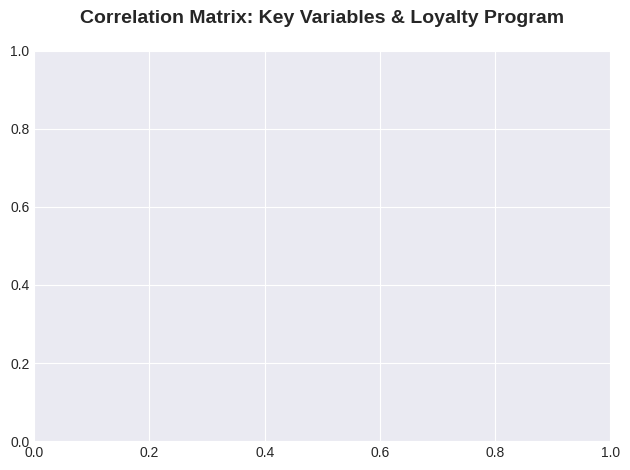

Figure 3 generated: Correlation Heatmap


In [57]:
# Figure 3: Correlation Heatmap
# Select numeric columns for correlation

# Calculate correlation

# Create heatmap
plt.title('Correlation Matrix: Key Variables & Loyalty Program', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("Figure 3 generated: Correlation Heatmap")

## 10. Initial Findings and Insights

**Sprint 1 Task S1-6:** Document findings in shared doc  
**Assigned:** Manpreet | **Status:** In Progress

In [56]:
# Generate comprehensive findings report
print("KEY FINDINGS FROM EXPLORATORY DATA ANALYSIS")

# Finding 1: Loyalty Adoption Variation

# Finding 2: Visit Frequency

# Finding 3: Revenue per visit

# Finding 4: Distance willing to travel

KEY FINDINGS FROM EXPLORATORY DATA ANALYSIS


## 10. Next Steps for Phase 2

Based on our Sprint 1 EDA, the following tasks are prioritized for Sprint 2:

**Machine Learning Development (Sprint 2-4):**
1. **Customer Segmentation:** Implement clustering algorithm to identify distinct customer groups based on:
   - Visit frequency
   - Average spending
   - Distance traveled
   - Loyalty program engagement

2. **Dealer Performance Clustering:** Group dealerships by:
   - Loyalty adoption success
   - Revenue performance
   - Customer retention metrics

3. **Predictive Modeling:** Develop models to:
   - Predict customer churn risk
   - Forecast loyalty program ROI by dealer
   - Identify factors driving customer distance willingness

